## GEOPH 531 : GEOPHYSICAL INVERSE THEORY


In [132]:
using DelimitedFiles, PyPlot, Statistics, LinearAlgebra, DataFrames

In [4]:
tomo_data=readdlm("tomo_data.txt"); # data set
xs=tomo_data[:,1]; # x coordinates of sources
zs=tomo_data[:,2]; # z coordinates of sources
xr=tomo_data[:,3]; # x coordinates of receiver
zr=tomo_data[:,4]; # z coordinates of receiver
t=tomo_data[:,5]; # Travel times;

In [138]:
df = DataFrame( "Sx" => xs, "Sz" => zs, "Rx" =>xr, "Rz"=>zr, "Travel Times"=>t) 
               
print(df)

2500×5 DataFrame
  Row │ Sx       Sz         Rx       Rz         Travel Times 
      │ Float64  Float64    Float64  Float64    Float64      
──────┼──────────────────────────────────────────────────────
    1 │     0.0    0.6        300.0    1.25         0.300482
    2 │     0.0    0.6        300.0    9.37245      0.300395
    3 │     0.0    0.6        300.0   17.4949       0.30117
    4 │     0.0    0.6        300.0   25.6173       0.300852
    5 │     0.0    0.6        300.0   33.7398       0.302496
    6 │     0.0    0.6        300.0   41.8622       0.302312
    7 │     0.0    0.6        300.0   49.9847       0.303661
    8 │     0.0    0.6        300.0   58.1071       0.30557
    9 │     0.0    0.6        300.0   66.2296       0.306523
   10 │     0.0    0.6        300.0   74.352        0.308729
   11 │     0.0    0.6        300.0   82.4745       0.310999
   12 │     0.0    0.6        300.0   90.5969       0.313059
   13 │     0.0    0.6        300.0   98.7194       0.316251
   14 

 2078 │     0.0  333.955      300.0  220.556        0.319666
 2079 │     0.0  333.955      300.0  228.679        0.318067
 2080 │     0.0  333.955      300.0  236.801        0.315799
 2081 │     0.0  333.955      300.0  244.923        0.313123
 2082 │     0.0  333.955      300.0  253.046        0.310828
 2083 │     0.0  333.955      300.0  261.168        0.308172
 2084 │     0.0  333.955      300.0  269.291        0.306959
 2085 │     0.0  333.955      300.0  277.413        0.305133
 2086 │     0.0  333.955      300.0  285.536        0.303358
 2087 │     0.0  333.955      300.0  293.658        0.302597
 2088 │     0.0  333.955      300.0  301.781        0.300859
 2089 │     0.0  333.955      300.0  309.903        0.3012
 2090 │     0.0  333.955      300.0  318.026        0.300746
 2091 │     0.0  333.955      300.0  326.148        0.30014
 2092 │     0.0  333.955      300.0  334.27         0.300324
 2093 │     0.0  333.955      300.0  342.393        0.300583
 2094 │     0.0  333.955   

In [ ]:
#Para cada fuente hay 50 travel times y hay 50 fuentes. Son 2500 traveltimes


In [ ]:
Δzs=zeros(Float64,length(zs));

for i=1:length(zs)-1
    
    if zs[i+1] == zs[i];
        
        Δzs[i] = 0.0;
    
    else
        Δzs[i]= zs[i+1] - zs[i]
    
    end
end


Δ̄zₛ = maximum(Δzs)



Δzr=zeros(Float64,length(zr));

for i=1:length(zr)-1
    
    if zr[i+1] == zr[i];
        
        Δzr[i] = 0.0;
    
    else
        Δzr[i]= zr[i+1] - zr[i]
    
    end
end


Δ̄zᵣ = mean(Δzr)
    
    

In [ ]:
Δ̄zs = 8.130
ns = Int(floor(maximum(zs)/ Δ̄zs))+ 1;
Δ̄zr=8.122; 
nr = Int(floor(maximum(zr)/ Δ̄zr))+ 1;
ns

In [ ]:
ΔS= ones(Float64, (Int(floor(nr*Δ̄zr)),Int(floor(ns*Δ̄zs))));

In [5]:
"""
Parametrize each ray
"""
function ParamRay(zr::Real,xr::Real,zs::Real,xs::Real)
    
    m=(zr-zs)/(xr-xs);
    b=zs;
    
    return m,b
end


ParamRay

In [6]:
"""
Get the parameters to build the straight rays from the data set.
"""

function GetRayParam(zr::Vector{Float64},xr::Vector{Float64},zs::Vector{Float64},xs::Vector{Float64})
    
    ns= length(zs);
    m=zeros(Float64,ns);
    b=zeros(Float64,ns);
    
    for i=1:ns
        m[i],b[i] = ParamRay(zr[i],xr[i],zs[i],xs[i])
    
    end
    
    
    return round.(m,digits=3), round.(b,digits=3)
    
end    



GetRayParam (generic function with 1 method)

In [7]:
d(x1,x2,y1,y2)= sqrt((x1-x2)^2 +(y1-y2)^2)  #Eculidean distance

d (generic function with 1 method)

In [ ]:
m, b = GetRayParam(zr,xr,zs,xs);


In [64]:
400/3

133.33333333333334

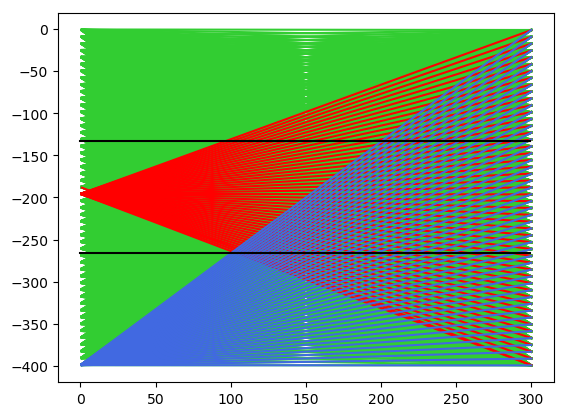

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f65162ebba8>

In [129]:
# Plot rays for  three different sourcs

x=collect(1:1:300)

for i= 1:2500#length(m)
    plot(x,  -1*(m[i]*x .+b[i]),c="LimeGreen")
end


for i= 1200:1:1250#length(m)
    plot(x,  -1*(m[i]*x .+b[i]), c="Red")
end


for i=2451:1:2500#length(m)
    plot(x,  -1*(m[i]*x .+b[i]), c="RoyalBlue")
end


plot(-133*ones(300),c="k")

plot(-266*ones(300),c="k")



In [ ]:

#=
#Evaluate intersections for x

#function D(t::Vector{Float64}, zr::Vector{Float64}, xr::Vector{Float64}, zs::Vector{Float64},xs::Vector{Float64}, dx::Float64,dz::Float64)
    
    
#Define the the grid using the data:
xf= maximum(xr); xi=minimum(xs); zf= maximum(zr); zi=minimum(zs); nr=length(t);

dx=50;
dz=50

gx=collect(xi:dx:xf);
gz=collect(zi:dz:zf);

#Parametrize the rays,
m, b = GetRayParam(zr,xr,zs,xs);
    
D=zeros(Float64,(nr,(length(gz)-1)*(length(gz)-1)))
z=zeros(length(gx)); x=zeros(length(gz))


nr=5
# Get the intersection for each ray with x and z.
for r= 1:1#1: 1#nr

    
    for i=1:length(gx)
        z[i] = m[r]*gx[i] .+ b[r] #ray    
    end

    for j=1:length(gz) 
        x[j]= (gz[j] - b[r])/m[r] ;
    end

#Build a matrix with the intersections and filter the values that are out the grid.
    Iz= [gx z]; 
    Ix= [x gz];
    I=[Iz; Ix]; 
    I = sortslices(I, dims=1)
 
    indx= findall(x->  x > xf || x < xi ,I[:,1])

    I= I[1:end .∉[indx], 1:end]; 
    

#Compute distances

    distance=zeros(size(I,1)-1);

    for i=1:size(I,1)-1;
        distance[i]=  d(I[i,1],I[i+1,1],I[i,2],I[i+1,2]); 
    end


    #Compute the center of each cell and assign values:
    centers=zeros(size(I,1)-1,2);
                

    for j in 1:size(I,2)
        for i in 1:size(I,1)-1
            centers[i,j]=((I[i+1,j]-I[i,j])/2)+I[i,j] #Calculation of segment center
        end
    end


    cellid=zeros(length(distance))
    nz=length(gz);
 #Number of cels in the grid that I defined.


    for i in 1:length(dist)
        cellid[i]= ceil(centers[i,2]/dz)+(((ceil(centers[i,1]/dx))-1)*nz);
    end
    
end


    
    

#    for j=1:length(cellid)
        #index=Int(cellid[j])
 #       D[r,index] = dist[j]
  #  end
    
#end


=#



In [ ]:

nx=30; dx=30.0
gx=dx*collect(0.0:1:nx);

length(gx)

In [ ]:
#Example 1:
#=
#function D(t::Vector{Float64}, zr::Vector{Float64}, xr::Vector{Float64}, zs::Vector{Float64},xs::Vector{Float64}, dx::Float64,dz::Float64)
    
=#
#Define the the grid using the data:
xf= maximum(xr); xi=minimum(xs); zf= maximum(zr); zi=minimum(zs); nr=length(t);

#dx=50;
#dz=50

#gx=collect(xi:dx:xf);
#gz=collect(zi:dz:zf);

#Parametrize the rays,
#m, b = GetRayParam(zr,xr,zs,xs);
    
#D=zeros(Float64,(nr,(length(gz)-1)*(length(gz)-1)))
#z=zeros(length(gx)); x=zeros(length(gz))

In [ ]:
dz= gz[3] - gz[2]



In [ ]:
gx

In [125]:
lz=99
lx=100
s=1/1000; nz=lz-1; nx=lx-1;

M0=s*ones(Float64,(nz,nx));
m0=zeros(Float64,nx*nz);


#ix=collect(1:1:size(M0,2));
#iz=collect(1:1:size(M0,1));

m0;

In [126]:
#Vectorize the model
for ix=1:nx
    for iz=1:nz
        k=(ix-1)*size(M0,1) +iz
        m0[k]=M0[iz,ix]
    end
end


In [128]:
D

2500×9702 Matrix{Float64}:
 3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0   0.0  0.0   0.0  0.0
 3.03  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.04  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.04  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.05  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.06  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0   0.0  0.0   0.0  0.0
 3.07  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.09  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.1   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.12  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0   0.0  0.0   0.0  0.0
 3.16  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  0.0   0.0  0.0
 3.19  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0   0.0  

In [99]:
dist

5-element Vector{Float64}:
 158.36
   3.68
 162.04
   3.73
 158.31

In [ ]:
function L_build(rwell,swell,gx,gz,scrd,rcrd,xgrid,ygrid,ymax,dx,dz)
    L=zeros(length(xrwell)*length(xswell),gx*gz);Js=Float64[];cellnum=Int[];Is=Float64[];Vs=Float64[]
    rayn=0;spV=Int[];
    for s in 1:length(swell[:,1])
        for r in 1:length(rwell[:,1])
                p1=[rwell[r,2] swell[s,2]];
                #println("p1 ",p1)
                p2=[rwell[r,1] swell[s,1]];
                #println("p2 ",p2)
                m=(rwell[r,2]-swell[s,2])/(rwell[r,1]-swell[s,1]); #Slope of the ray
                b=rwell[r,2]-(rwell[r,1]*m); #Intercept of the ray
                #println(m," ",b)
                #Determination grid points involved in distance calculation
                xcross=((ygrid.-b)./m); # Variable X at the fixed Y of the grid OJO Round
                ycross=((m.*xgrid).+b); # Variable Y at the fixed X of the grid OJO Round
                #println(xcross)
                #println(ycross)
                t1=[ycross' ygrid' p1;  xgrid' xcross' p2];
                #println(t1)
                t2=unique(sortslices(round.(t1;digits=2),dims=2,by=x->x[2],rev=false),dims=2); #Sorted array with all the points
                #println("T2 ", t2)
                #x=0;
                #tt=(findall(x->x>rcrd||x<scrd||isequal(x,NaN),t2));
                tt1= findall(x->x>rcrd||x<scrd,t2[2,:])
                tt2= findall(x->x>ymax||x<scrd,t2[1,:])
                tt=[tt1;tt2]
                #println(tt)
                #println(typeof(tt))
                #tt=vcat(tt1,tt2)
                #println("Index to delete :",tt1,tt2)
                a=zeros(length(tt))
                for i in 1:length(tt)
                    a[i]=tt[i][1]; #loop to extract the indices of the collumns that are out of bounds
                end
                crossmat =t2[:, 1:end .∉[a]]; #Final Cross matrix without undesired value
                #println("crossmat ",crossmat)
                #distance calculator
                d=zeros(length(crossmat[1,:])-1);
                for i in 1:length(crossmat[1,:])-1
                    d[i]=sqrt(((crossmat[1,i+1]-crossmat[1,i])^2)+(crossmat[2,i+1]-crossmat[2,i])^2);
                end
                #println("Distances :", d)
                td=sum(d);
                #Cell definition
                    c=zeros(2,length(crossmat[1,:])-1);
                for i in 1:2
                    for j in 1:length(crossmat[1,:])-1
                            c[i,j]=((crossmat[i,j+1]-crossmat[i,j])/2)+crossmat[i,j] #Calculation of segment center
                    end
                end
                #println("Centers of segments", c)            
                cellnum=zeros(length(d))
                for i in 1:length(d)
                    cellnum[i]=ceil(c[1,i]/dz)+(((ceil(c[2,i]/dx))-1)*gz)#+(gz*(temp3[2,i]-1)); #Calculation of cell number
                end

In [130]:
σ=4e-4

0.0004

In [ ]:
δ

In [44]:
m, b = GetRayParam(zr,xr,zs,xs);

gx= LinRange(0.0,300.0,lx);
dx= gx[3] - gx[2]

#lz=101;
gz=LinRange(0.0,400.0,lz);
dz= gz[3] - gz[2]

nr=length(t)


D=zeros(Float64,(nr,(length(gz)-1)*(length(gx)-1)))
z=zeros(length(gx)); x=zeros(length(gz))






# Get the intersection for each ray with x and z.
for r=1:nr
#    r=1
    for i=1:length(gx)
        z[i] = m[r]*gx[i] .+ b[r] #ray    
    end

    for j=1:length(gz) 
        x[j]= (gz[j] - b[r])/m[r] ;
    end

    Iz= [gx z]; 
    Ix= [x gz];

    Izt=copy(transpose(Iz));
    Ixt=copy(transpose(Ix))



    CP=[Izt Ixt];

    CP = sortslices(CP, dims=2)





    indx1= findall(x->x>300||x<0,CP[1,:]);
    indx2= findall(x->x>400||x<0,CP[2,:]);
    
    indx=[indx1;indx2];


    aux=zeros(length(indx))

    for i in 1:length(indx)
        aux[i]=indx[i][1]; #loop to extract the indices of the collumns that are out of bounds
    end

    CP = CP[:, 1:end .∉[aux]]; #Final Cross matrix without undesired value
    
    dist=zeros(length(CP[1,:])-1);

    for i in 1:length(CP[1,:])-1
        dist[i]=sqrt(((CP[1,i+1]-CP[1,i])^2)+(CP[2,i+1]-CP[2,i])^2);
    end


     c=zeros(2,length(CP[1,:])-1);

     for i in 1:2
        for j in 1:length(CP[1,:])-1
            c[i,j]=((CP[i,j+1]-CP[i,j])/2)+CP[i,j] #Calculation of segment center
        end
     end

    nz=length(gz)-1 #Number of cels in the grid that I defined.


     cellnum=zeros(length(dist))
     for i in 1:length(dist)
        cellnum[i]=ceil(c[1,i]/dz)+(((ceil(c[2,i]/dx))-1)*nz)

    end

    for j=1:length(cellnum)
        index=Int(cellnum[j])
        D[r,index] = dist[j]
    end
    
end





#=
# Organize the point pairs into two vectors. 

    Iz= [gx z]; 
    Ix= [x gz];

    CP=[Iz; Ix]; 
    CP = sortslices(CP, dims=1)

    indx1= findall(x->  x > 300.0 || x < 0.0 ,CP[:,1])
    indx2= findall(x->  x > 400.0 || x < 0.0 ,CP[:,2])
    CP= CP[1:end .∉[indx1], 1:end]; 
    CP= CP[1:end,1:end .∉[indx2]]; 
#I= I[1:end, 1:end .∉[indx2]]; 


    dist=zeros(size(CP,1)-1);

    for i=1:size(CP,1)-1;
        dist[i]=  d(CP[i,1],CP[i+1,1],CP[i,2],CP[i+1,2]); 
    end

    
    #dist=round.(dist, digits=2)
#Cell definition
    c=zeros(size(CP,1)-1,2);
                

    for j in 1:size(CP,2)
        for i in 1:size(CP,1)-1
            c[i,j]=((CP[i+1,j]-CP[i,j])/2)+CP[i,j] #Calculation of segment center
        end
    end

    #c=round.(c,digits=2)

    id=zeros(length(dist))

    nz=length(gz)-1 #Number of cels in the grid that I defined.


    for i in 1:length(dist)
        id[i]= ceil(c[i,2]/dz)+(((ceil(c[i,1]/dx))-1)*nz) #(ceil(c[i,1]/dz))+(((ceil(c[i,2]/dx))-1)*gz)
    end



    for j=1:length(id)
 #       index=Int(id[j])
  #      D[r,index] = dist[j]
   # end


=#    


LoadError: BoundsError: attempt to access 2500×2500 Matrix{Float64} at index [39, 2537]

In [43]:
dist

50-element Vector{Float64}:
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988007
 6.000011999987993
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 ⋮
 6.000011999988
 6.000011999988
 6.000011999987971
 6.000011999988028
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988
 6.000011999988

In [ ]:
indx1= findall(x->x>300||x<0,CP[1,:])
indx2= findall(x->x>400||x<0,CP[2,:])
#                tt=[tt1;tt2]

In [ ]:
indx=[indx1;indx2]


In [ ]:
μ=100.0

In [ ]:
crossmat

In [ ]:

Ixt=copy(transpose(Ix))
#x
#gz

In [ ]:
I=[Izt Ixt];



In [ ]:
function DLS(D,t,μ,m0)
    
    Id=Matrix{Int64}(I,(length(m0),length(m0)))
    A=inv(D'*D + μ*Id);
    g=D'*t; +μ*m0
    m=A*g;
    
    return m
    
    
end


    

In [ ]:
m=DLS(D,t,μ,m0)

In [ ]:
#Third test


    
lx=10;
gx= LinRange(0.0,300.0,lx);

lz=10;
gz= LinRange(0.0,400.0,lz);


z=zeros(length(gx))
x=zeros(length(gz))




# Get the intersection for each ray with x and z.
for r= 500#500#nr
    #1 :nr
    
    for i=1:length(gx)
        z[i] = m[r]*gx[i] .+ b[r] #ray    
    end

    for j=1:length(gz) 
        x[j]= (gz[j] - b[r])/m[r] ;
    end
end

# Organize the point pairs into two vectors. 

Iz= [gx  z]; 
Iz=copy(transpose(Iz));
Ix= [x gz];
Ix=copy(transpose(Ix));
I=[Iz Ix]; 
I = sortslices(I, dims=2)


In [ ]:
minimum()

In [ ]:
indx1= findall(x->  x > 300 || x < 0 ,I[1,:]);
indx2= findall(x-> x>400|| x< 0.6,I[2,:])


                #tt2= findall(x->x>ymax||x<scrd,t2[1,:])

I= I[1:end,1:end .∉[indx]]; I
 

#tt2= findall(x->x>ymax||x<scrd,t2[1,:])


In [ ]:
dist=zeros(length(I[1,:])-1);

for i in 1:length(I[1,:])-1
    dist[i]=sqrt(((I[1,i+1]-I[1,i])^2)+(I[2,i+1]-I[2,i])^2);
end

In [ ]:
c=zeros(2,length(I[1,:])-1);

for i in 1:2
    for j in 1:length(I[1,:])-1
        c[i,j]=((I[i,j+1]-I[i,j])/2)+I[i,j] #Calculation of segment center
    end
end

In [ ]:
c

In [ ]:
#println("Centers of segments", c)            
cellnum=zeros(length(dist))

nz=length(gz)-1
dx=150
dz=200

for i in 1:length(dist)
    cellnum[i]=ceil(c[1,i]/dz)+(((ceil(c[2,i]/dx))-1)*nz)#+(gz*(temp3[2,i]-1)); #Calculation of cell number
end

In [ ]:
cellnum

In [ ]:
gz

In [ ]:
 findall(x->x>rcrd||x<scrd,t2[2,:])

In [ ]:
A=[2 3 ; 3 5]

In [ ]:
findall(x->x>3,A[2,:])

In [ ]:
  tt1= findall(x->x>rcrd||x<scrd,t2[2,:])
                tt2= findall(x->x>ymax||x<scrd,t2[1,:])
                tt=[tt1;tt2]
                #println(tt)
                #println(typeof(tt))
                #tt=vcat(tt1,tt2)
                #println("Index to delete :",tt1,tt2)
                a=zeros(length(tt))
                for i in 1:length(tt)
                    a[i]=tt[i][1]; #loop to extract the indices of the collumns that are out of bounds
                end
                crossmat =t2[:, 1:end .∉[a]]; #Final Cross matrix without undesired value
                #println("crossmat ",crossmat)
                #distance calculator
                d=zeros(length(crossmat[1,:])-1);
                for i in 1:length(crossmat[1,:])-1
                    d[i]=sqrt(((crossmat[1,i+1]-crossmat[1,i])^2)+(crossmat[2,i+1]-crossmat[2,i])^2);
                end
                println("Distances :", d)
                td=sum(d);
                #Cell definition
                    c=zeros(2,length(crossmat[1,:])-1);
                for i in 1:2
                    for j in 1:length(crossmat[1,:])-1
                            c[i,j]=((crossmat[i,j+1]-crossmat[i,j])/2)+crossmat[i,j] #Calculation of segment center
                    end
                end
                #println("Centers of segments", c)            
                cellnum=zeros(length(d))
                for i in 1:length(d)
                    cellnum[i]=ceil(c[1,i]/dz)+(((ceil(c[2,i]/dx))-1)*gz)#+(gz*(temp3[2,i]-1)); #Calculation of cell number
                end
                println("Numero de celda :",cellnum)